## Solving Differential Equations in Python

When modelling biological systems, we almost always consider dynamic systems.  Iin order to describe these, differential equations can be used. Here we will look at how we can define such equations in Python and also solve them in different ways. As an example, let's consider the growth of a population over time, which can be described by the following equation:
\begin{align}
\frac{dr}{dt} = k \cdot r 
\end{align}
Where $r$ describes the the number of individuals in the population and $k$ the growth rate. By defining the equation in this way, we have also directly made the assumption that our individuals do not die. In order to solve the equation, initial conditions have to be determined:
\begin{align}
r(t_{0})= r_{0}
\end{align}

This condition only states that the number of individuals in the population $r$ at time $t_{0}$ is equal to the initial number $r_{0}$. Such a simple differential equation can be solved analytically quite well: 
\begin{align}
r(t) &= r_0 \cdot e^{kt} \\
\end{align}
And this analytical solution will later serve as a comparison to our numerical solutions, which we will get from the [Euler method](https://en.wikipedia.org/wiki/Euler_method).

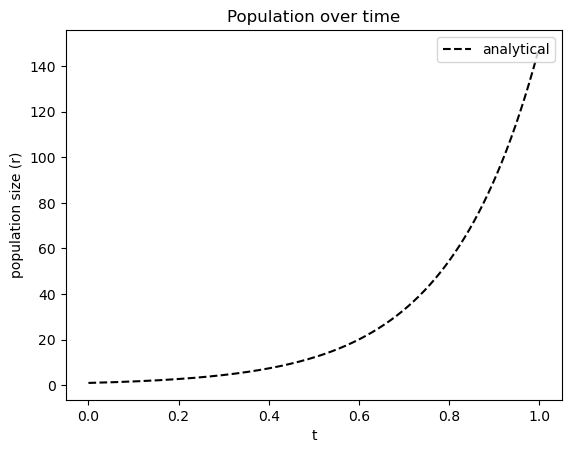

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define the equation from above for t0 = 0
def r_t(k, t0, r0, t):
    return r0* np.exp(k * t)

# set parameter values
k = 5
r0 = 1

# define time steps
t_a = np.linspace(0, 1, 1001)
t0 = t_a[0]

sol_a = r_t(k, t0, r0, t_a)

plt.plot(t_a, sol_a, color="black", linestyle='--')
plt.xlabel("t")
plt.ylabel("population size (r)")
plt.title("Population over time")
plt.legend(["analytical"], loc="upper right")
plt.show()

### The Euler method

The Euler method is a numerical approach to approximate first order differential equations (ODEs) for given initial value(s). Considering the initial value problem:

\begin{align}
y' &= f(x,y) \\
y(x_{0}) &= y_{0}
\end{align}

We want to compute approximate values of $y$ at $n$ equally spaced points in the given intervall $[x_{0}, b]$. Therefore, we need a step size of 
\begin{align}
\Delta x = \frac{b - x_{0}}{n} 
\end{align}


We start with the known value $y_{0}$ and  iteratively compute the subsequent values $y_{1},...,y_{n}$. Hereby the value of $y_{i+1}$ is given by

\begin{align}
y_{i+1} &= y_{i} + \Delta x \cdot f(x_{i},y_{i}), \text{  where  }  i \in [0,n-1].
\end{align}


Perhaps the easiest way to understand this is to apply it to our exponential growth. Here, the size $r_{i+1}$ of the population at time $t_{i+1}$ according to the euler method is given by

\begin{align}
r_{i+1} &= r_{i} + \Delta t \cdot f(t_{i},r_{i}) =r_{i} + \Delta t \cdot (k \cdot r_{i}).
\end{align}

To approximate the population size at all given timepoints

| $t  $ | $t_0$ | $t_1$ | $t_2$ |  ...  | $t_n$ | 
|-------|-------|-------|-------|-------|-------|
| $r  $ | $r_0$ |  $?$  |  $?$  |  $?$  |  $?$  |

we need to start at the initial value $r_{0}$ and compute $r_{1}$, which is given by inserting $r_{0}$ in the equation above

\begin{align}
r_{1} &= r_{0} +  \Delta t \cdot (k \cdot r_{0}).
\end{align}

| $t  $ | $t_0$ | $t_1$ | $t_2$ |  ...  | $t_n$ | 
|-------|-------|-------|-------|-------|-------|
| $r  $ | $r_0$ |$r_{i}$|  $?$  |  $?$  |  $?$  |

This process will be repeated until we approximated our function at all given time steps $n$.


\begin{align}
r_{n} &= r_{n-1} +  \Delta t \cdot (k \cdot r_{n-1}).
\end{align}

| $t    $    |$t_0$ |$t_1$ | $t_2$ | ... |$t_n$ |
| -------    |-----| -----| -----| -----| -----| 
| $r    $    | $r_0$| $r_{1}$ | $r_{2}$ | ... | $r_{n}$ |


Since this is an approximation of the real solution, this method will lead to some kind of error. These are dependent on the step size. Therefore, the smallest possible step size should always be selected, though this comes with a cost in terms of performance. Hence, a good balance must be found between accuracy and speed. In the following, the Euler method is implemented. The goal is to keep the function as general as possible so that the method can be applied to all types of differential equations. 


![euler](euler_anim.gif)

### Exercise 1


1. Define the linear differential function.

In [3]:
def r_t_numerica(k, r0, dt, T):
    N = int(T/ dt)
    r = np.zeros(N)
    r[0] = r0
    for i in range(1, N):
        r[i] = r[i-1] + k * r[i-1] * dt
    return r

2. Declare your initial values $r_0 = 1$ and the time vector $t = [0,1]$, where $\Delta t = 0.1$ .

3. Define the Euler function that takes as arguments initial value, time vector and function.


4. Plot on one figure the euler approximation of your function with the actual function given above with $k = 5$.

In [4]:
r_0 = 1
k = 5
T = 1
dt = 0.01	
r_5 = r_t_numerica(k, r_0, dt, T)


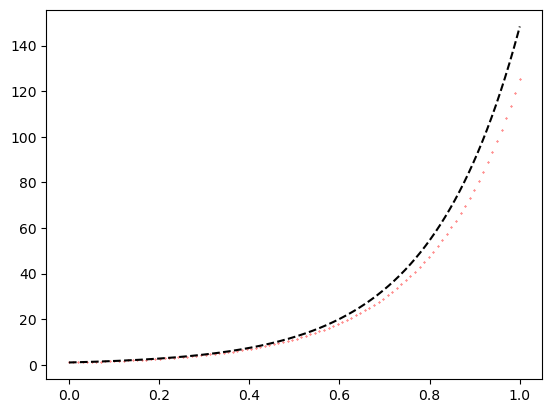

In [5]:

plt.plot(t_a, sol_a, color="black", linestyle='--')
plt.scatter(np.linspace(0, T, int(T/dt)), r_5, color="red", s=0.1)

5. Investigate the impact of the step size and number of points on the accuracy of the solution in the [0,1] interval. Select the step size $\Delta$ t = 0.01,0.05,0.1,0.2

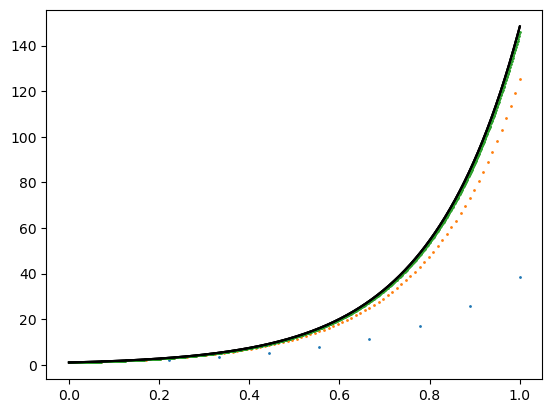

In [6]:
dt_array = [0.1, 0.01, 0.001]
for dt in dt_array:
    r = r_t_numerica(k, r_0, dt, T)
    plt.plot(t_a, sol_a, color="black")
    plt.scatter(np.linspace(0, T, int(T/dt)), r, s=1)

## Solving more than one equation: The Lotka–Volterra model



Also known as the predator–prey equations, are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations:

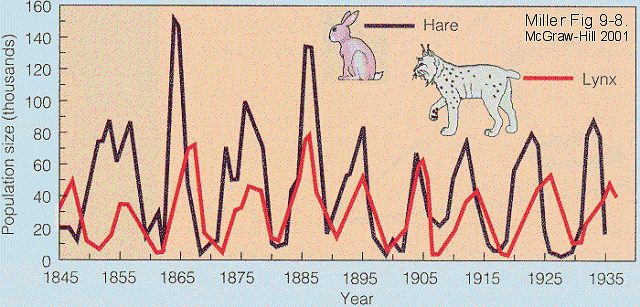

The instantaneous growth rates of the two populations are described by following equations:
$$
\displaystyle {\begin{aligned}{\frac {dx}{dt}}&=\alpha x-\beta xy,\\{\frac {dy}{dt}}&=\delta xy-\gamma y,\end{aligned}}
$$
where
- x is the number of preys,
- y is the number of some predators,
- t represents time,
- α, β, γ, δ are constant parameters describing the behavior of the population
  - α is the natural growing rate of preys, when there's no predator
  - β is the natural dying rate of preys, due to predation
  - γ is the natural dying rate of predators, when there's no prey
  - δ is the factor describing growth rate of predator that depends on the number of available preys.

We will set these parameters as: α = 1.1 , β = 0.4, γ = 0.4 , δ = 0.1.

### Exercise 1
Define the function called *lotkavoltera* that will return the growth rates of both species.

In [26]:
para_dict = {"alpha": 1.1, "beta": 0.4, "gamma": 0.4, "sigma": 0.1, "x0": 40, "y0": 9, "T2": 100, "dt": 0.01}


In [ ]:
def r_t_numerica(k, r0, dt, T):
    N = int(T/ dt)
    r = np.zeros(N)
    r[0] = r0
    for i in range(1, N):
        r[i] = r[i-1] + k * r[i-1] * dt
    return r

In [27]:
def lotka_volterra(para):
    N = int(para["T2"]/para["dt"])
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = para["x0"]
    y[0] = para["y0"]
    dx_dt = lambda x,y,para : (para["alpha"] * x - para["beta"] * x * y)*para["dt"]
    dy_dt = lambda x,y,para : (para["sigma"] * x * y - para["gamma"] * y)*para["dt"]

    for i in range(N-1):
        x[i+1] = x[i] + dx_dt(x[i],y[i],para)
        y[i+1] = y[i] + dy_dt(x[i],y[i],para)
    return x,y

### Exercise 2
Find the population size after given period of time. In other words, integrate the system over time. To solve the system we can use our Euler function. It may need to be adapted to accept a list as input and return a list of the two growth rates.

In [36]:
para_dict = {"alpha": 1.1, "beta": 0.4, "gamma": 0.4, "sigma": 0.1, "x0": 40, "y0": 9, "T2": 100, "dt": 0.0001}


In [37]:
x,y = lotka_volterra(para_dict)

In [38]:
t = np.linspace(0,para_dict["T2"], int(para_dict["T2"]/para_dict["dt"]) )

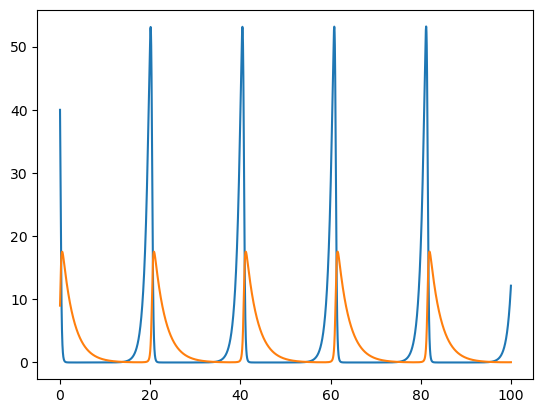

In [39]:
x, y = lotka_volterra(para_dict)

plt.plot(t,x)
plt.plot(t,y)

2.1 Define the time vector for the integration.

2.2 Define the initial conditions and parameters.

2.3 Run the simulations and store the results in ```solution``` variable.

2.4 Plot the solutions over the time. Remember to label the axis and give a reasonable title. 

### Exercise 3
Change the values for the four different parameters systematically and plot your results.